Here is some simple code for generating Hinton diagrams in Julia.
    
The package required is [Compose.jl](http://pkg.julialang.org/?pkg=Compose&ver=release).

In [ ]:
using Compose
Compose.set_default_graphic_size(4inch, 4inch);

In [10]:
function plothinton{T<:Real}(M::AbstractMatrix{T})
    Elements = Any[]
    m, n = size(M) #Get dimensions of matrix
    for i=1:m, j=1:n
        z = abs(M[i,j])
        thecolor = M[i,j]<0 ? "white" : "black"
        push!(Elements, compose(
            #Map each entry to a colored rectangle
            context(units=UnitBox(0.5,0.5,m,n)),
            rectangle(i-z/2, j-z/2, z, z), 
            stroke(thecolor), fill(thecolor)
        ))
    end
    compose(context(),
        rectangle(0,0,1,1), fill("lightgrey"), #Background
        Elements...
    )
end

plothinton (generic function with 1 method)

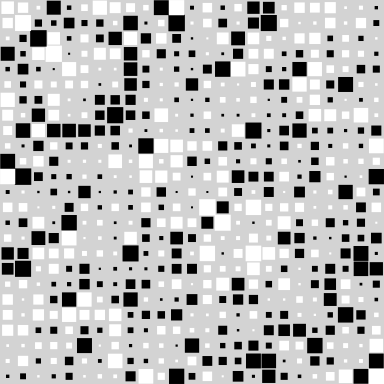

In [11]:
x=2rand(25, 25).-1 |> x-> (x+x')/2
plothinton(x)